In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2 as cv

from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
train_data = np.load('./train.npz')


y_train = train_data['y']


In [ ]:
height = 64
width = 64

In [22]:

x_train = []
for image in train_data['x']:
    image_from_array = Image.fromarray(image)
    resized_image = image_from_array.resize((height, width)) 
    x_train.append(np.array(resized_image))

In [24]:
x_train = np.array(x_train)
x_train = x_train.reshape(-1, height, width, 1)
x_train.shape

(1200, 64, 64, 1)

In [26]:
test_data = np.load('./test.npz')

x_test = []
for image in test_data['x']:
    image_from_array = Image.fromarray(image)
    resized_image = image_from_array.resize((height, width)) 
    x_test.append(np.array(resized_image))
    
x_test = np.array(x_test)
x_test = x_test.reshape(-1, height, width, 1)
x_test.shape

(400, 64, 64, 1)

In [27]:
x_train.shape, y_train.shape

((1200, 64, 64, 1), (1200,))

300 300


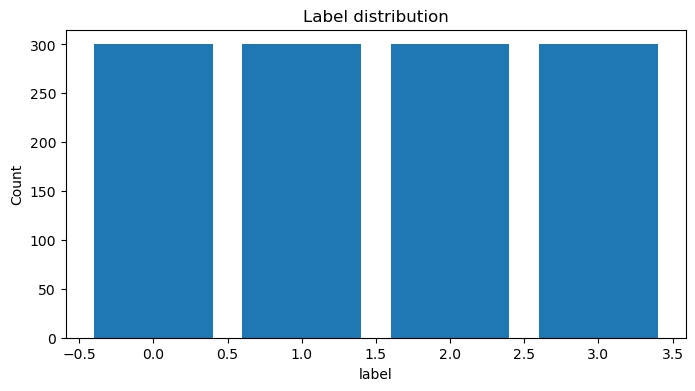

In [28]:
unique, counts = np.unique(y_train, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
print(max(counts), min(counts))

# label distribution
plt.figure(figsize=(8,4))
plt.bar(*zip(*uniq_cnt_dict.items()))
plt.title('Label distribution')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, initializers, optimizers, losses, Sequential

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation

def SimpleCNN4():
    model = Sequential([
        Conv2D(64, (3,3), padding='same', activation="relu", input_shape=(height, width, 1)),
        BatchNormalization(),
        Activation('relu'),
        
        Conv2D(128, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        
        MaxPool2D((2, 2)),
        
        Conv2D(256, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        
        Conv2D(128, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPool2D((2, 2)),
        
        Conv2D(64, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        
        Conv2D(64, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPool2D((2, 2)),
        
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.5),
        Dense(4, activation="softmax")])
    
    return model



In [31]:

X_train, x_val, Y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=0)



In [32]:
X_train.shape

(960, 64, 64, 1)

In [33]:

from tensorflow.keras.utils import to_categorical

X_train = X_train / 255
x_val = x_val / 255
Y_train = to_categorical(np.array(Y_train))
y_val = to_categorical(np.array(y_val))

In [36]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau



model = SimpleCNN4()

rlr_call = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


with tf.device("/device:GPU:0"):
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, 
                        validation_data=(x_val, y_val), verbose=2,
                        callbacks=[rlr_call])

Epoch 1/100
30/30 - 7s - loss: 1.8296 - accuracy: 0.5385 - val_loss: 1.9164 - val_accuracy: 0.2500 - lr: 0.0010 - 7s/epoch - 243ms/step
Epoch 2/100
30/30 - 2s - loss: 0.5670 - accuracy: 0.7375 - val_loss: 5.2879 - val_accuracy: 0.2500 - lr: 0.0010 - 2s/epoch - 79ms/step
Epoch 3/100
30/30 - 2s - loss: 0.4340 - accuracy: 0.8125 - val_loss: 7.7560 - val_accuracy: 0.2500 - lr: 0.0010 - 2s/epoch - 59ms/step
Epoch 4/100
30/30 - 2s - loss: 0.4221 - accuracy: 0.8177 - val_loss: 7.4328 - val_accuracy: 0.2500 - lr: 0.0010 - 2s/epoch - 74ms/step
Epoch 5/100

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
30/30 - 2s - loss: 0.3657 - accuracy: 0.8521 - val_loss: 7.2322 - val_accuracy: 0.2500 - lr: 0.0010 - 2s/epoch - 55ms/step
Epoch 6/100
30/30 - 2s - loss: 0.2806 - accuracy: 0.8917 - val_loss: 8.7586 - val_accuracy: 0.2500 - lr: 1.0000e-04 - 2s/epoch - 71ms/step
Epoch 7/100
30/30 - 1s - loss: 0.2408 - accuracy: 0.9125 - val_loss: 8.7869 - val_accuracy: 0.2500 - lr: 1.

30/30 - 2s - loss: 0.1876 - accuracy: 0.9344 - val_loss: 0.2638 - val_accuracy: 0.8958 - lr: 1.0000e-11 - 2s/epoch - 73ms/step
Epoch 56/100
30/30 - 2s - loss: 0.1848 - accuracy: 0.9344 - val_loss: 0.2637 - val_accuracy: 0.8958 - lr: 1.0000e-12 - 2s/epoch - 54ms/step
Epoch 57/100
30/30 - 2s - loss: 0.2166 - accuracy: 0.9250 - val_loss: 0.2638 - val_accuracy: 0.9000 - lr: 1.0000e-12 - 2s/epoch - 53ms/step
Epoch 58/100
30/30 - 2s - loss: 0.1726 - accuracy: 0.9427 - val_loss: 0.2637 - val_accuracy: 0.9000 - lr: 1.0000e-12 - 2s/epoch - 73ms/step
Epoch 59/100

Epoch 59: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.
30/30 - 2s - loss: 0.1995 - accuracy: 0.9302 - val_loss: 0.2637 - val_accuracy: 0.9000 - lr: 1.0000e-12 - 2s/epoch - 59ms/step
Epoch 60/100
30/30 - 2s - loss: 0.1842 - accuracy: 0.9260 - val_loss: 0.2637 - val_accuracy: 0.9000 - lr: 1.0000e-13 - 2s/epoch - 72ms/step
Epoch 61/100
30/30 - 2s - loss: 0.1911 - accuracy: 0.9385 - val_loss: 0.2638 - val_accuracy: 0

In [37]:
x_test = x_test / 255

In [39]:
df = pd.DataFrame(columns=['ID','class'])
df

Empty DataFrame
Columns: [ID, class]
Index: []

In [42]:
df['ID'] = list(range(1, x_test.shape[0]+1))

In [43]:
df

ID class
0      1   NaN
1      2   NaN
2      3   NaN
3      4   NaN
4      5   NaN
..   ...   ...
395  396   NaN
396  397   NaN
397  398   NaN
398  399   NaN
399  400   NaN

[400 rows x 2 columns]

In [38]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(y_pred)

13/13 [==============================] - 0s 9ms/step
[1 2 1 3 0 1 1 1 0 3 3 0 3 1 1 2 0 2 2 1 1 3 0 2 2 3 2 1 0 1 1 0 3 3 0 1 3
 2 2 2 2 0 1 0 0 0 2 1 2 2 0 2 0 1 0 2 0 2 2 1 2 1 2 0 2 2 3 0 2 2 1 2 3 3
 3 3 2 1 3 2 0 3 2 1 0 1 3 3 3 1 2 3 1 3 1 3 1 3 2 2 2 3 3 1 0 1 2 1 0 0 0
 3 2 1 3 1 1 3 1 3 1 3 2 2 2 2 1 2 0 3 0 1 0 2 1 3 3 1 2 1 2 0 1 0 3 0 2 1
 0 2 0 0 1 1 0 0 2 1 0 3 0 2 1 3 1 3 2 1 3 1 0 3 3 0 1 1 0 3 3 2 3 0 1 1 0
 0 2 3 0 1 1 3 2 2 3 3 3 3 3 0 2 0 0 0 3 1 3 3 1 3 3 0 1 0 3 3 2 0 0 0 1 1
 2 3 1 2 1 2 3 0 3 3 3 3 2 2 3 2 2 1 1 1 1 2 1 0 2 1 3 1 3 0 2 2 1 3 1 3 3
 3 0 1 2 3 1 1 2 1 2 1 3 1 0 2 0 0 1 3 2 2 2 1 1 1 1 3 2 2 0 1 2 2 2 3 3 2
 1 2 0 0 0 0 1 2 0 0 2 2 3 1 3 0 3 3 2 2 0 0 0 1 2 3 0 1 0 1 2 0 1 3 0 1 2
 1 2 0 1 0 2 0 0 3 2 1 0 1 0 2 3 0 3 1 1 1 3 3 0 0 1 0 0 0 3 3 0 3 1 0 3 1
 3 1 0 0 0 0 0 1 0 1 0 3 3 1 2 1 1 3 3 3 0 0 2 0 1 0 0 0 3 1]


In [44]:
df['class'] = y_pred

In [45]:
df

ID  class
0      1      1
1      2      2
2      3      1
3      4      3
4      5      0
..   ...    ...
395  396      0
396  397      0
397  398      0
398  399      3
399  400      1

[400 rows x 2 columns]

In [46]:
df.to_csv('submission.csv', index=False)